In [74]:
from ripser import ripser
from persim import plot_diagrams
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random
from math import dist

In [75]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def compose_isoms(i1,i2, i3):
    def comp(x,y):
        x2 = i1(x,y)[0]
        y2 = i1(x,y)[1]
        x3 = i2(x2,y2)[0]
        y3 = i2(x2,y2)[1]
        return i3(x3,y3)
    return comp

In [76]:
from PIL import Image
from PIL import Image, ImageFilter 
from numpy import asarray

In [77]:
def matrix(image_function, num_pixels, window_size, n_isos, x_translate, y_translate):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    return M

def view_isom(vector, num_pixels):
    vector.reshape(num_pixels,num_pixels)
    
    x_points = num_pixels * list(np.linspace(-10, 10, num_pixels))
    y_points = num_pixels * list(np.linspace(-10, 10, num_pixels))
    y_points.sort()
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = vector)
    plt.show()

def compress(image_file):

    filepath = os.path.join(os.getcwd(), image_file)

    image = Image.open(filepath)

    image.save("image-file-compressed",
                 "JPEG",
                 optimize = True,
                 quality = 10)
    return

In [78]:
M = matrix(image_function = p3, num_pixels = 40, window_size = 50, n_isos= 1000, x_translate = 200, y_translate = 200)

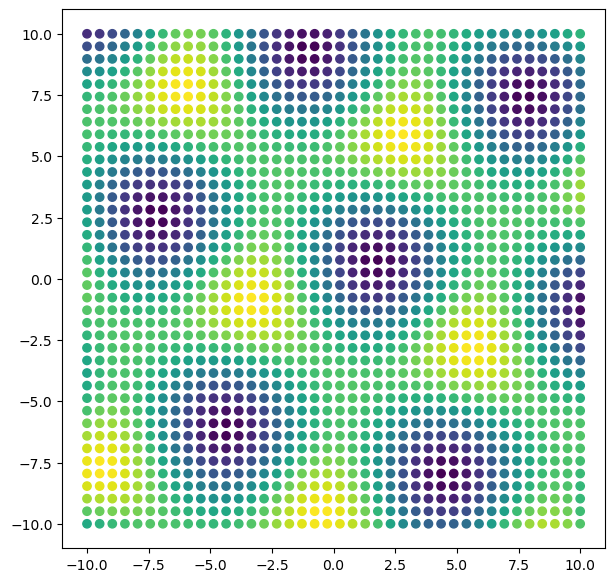

In [79]:
M0 = M[0]
view_isom(M0, 40)

In [80]:
M0 = M[0].reshape(40,40)

In [81]:
M0

array([[ 0.19064394,  0.42562096,  0.67197267, ...,  2.10865611,
         1.72310884,  1.04054025],
       [ 1.19070371,  1.38263278,  1.52305462, ...,  1.72385674,
         1.41484285,  0.80759724],
       [ 2.00352365,  2.16387012,  2.21102021, ...,  1.38389812,
         1.1706506 ,  0.66861784],
       ...,
       [-1.5185071 , -1.30882658, -0.8533667 , ..., -2.03243602,
        -1.48758525, -0.87526234],
       [-2.38193664, -2.18091412, -1.70228065, ..., -1.11346186,
        -0.67813035, -0.21231814],
       [-3.15877984, -2.97098638, -2.48231711, ..., -0.10103068,
         0.21346813,  0.51400358]])

In [82]:
M0.min()

-4.090567456055744

In [87]:
M_pos = (M0)-M0.min()

In [88]:
M_pos.max()

7.08828817896041

In [89]:
M_norm = M_pos/(M_pos.max())
M_norm

array([[0.60398382, 0.63713386, 0.67188862, ..., 0.87457273, 0.82018058,
        0.72388531],
       [0.74507004, 0.77214697, 0.79195737, ..., 0.82028609, 0.7766911 ,
        0.69102223],
       [0.85974088, 0.8823622 , 0.88901403, ..., 0.77232548, 0.74224099,
        0.67141532],
       ...,
       [0.36286058, 0.39244184, 0.45669711, ..., 0.29035663, 0.36722296,
        0.45360813],
       [0.24104985, 0.26940966, 0.33693421, ..., 0.42000346, 0.48141907,
        0.54713483],
       [0.13145453, 0.15794802, 0.2268884 , ..., 0.56283501, 0.60720381,
        0.64960268]])

In [90]:
Muint8 = np.uint8((M_norm)*255)
im = Image.fromarray(Muint8)
im.size

(40, 40)

In [91]:
type(im)

PIL.Image.Image

In [92]:
im.save("image-compressed",
                 "JPEG",
                 quality = 10)

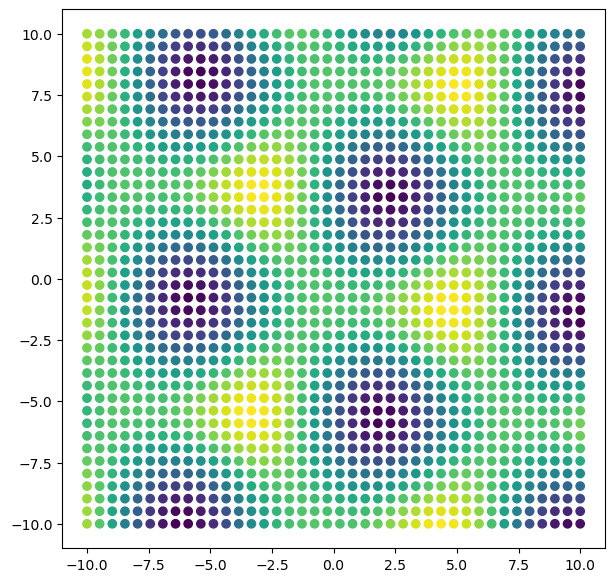

In [93]:
M1 = M[1]
view_isom(M1, 40)

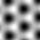

In [94]:
M1 = M[1].reshape(40,40)
M1_pos = (M1)+(-M1.min())
M1_norm = M1_pos/(M1_pos.max())
M1uint8 = np.uint8((M1_norm)*255)
im1 = Image.fromarray(M1uint8)
im1 

In [95]:
M1_pos

array([[6.04208803, 5.17805272, 4.14036555, ..., 0.44863521, 0.19446823,
        0.27584034],
       [6.05836658, 5.21214177, 4.19433887, ..., 0.89993987, 0.68762264,
        0.7921682 ],
       [5.99364973, 5.23376385, 4.3044789 , ..., 1.57353196, 1.42475408,
        1.56362471],
       ...,
       [6.7384968 , 6.24932978, 5.50580403, ..., 1.87432215, 1.31367598,
        1.03254693],
       [6.49714163, 6.11212365, 5.48221701, ..., 2.48454137, 2.03443014,
        1.83432921],
       [6.11971327, 5.88755422, 5.42243901, ..., 3.16839316, 2.84383897,
        2.73507935]])

In [97]:
im1.save("image1-compressed",
                 format = "JPEG",
                 quality = 1)

In [128]:
from image_similarity_measures.evaluate import evaluation

In [131]:
evaluation(org_img_path="images/image-compressed", 
           pred_img_path="images/image1-compressed", 
           metrics=["rmse"])

{'rmse': 0.02258724719285965}

In [138]:
def view_dist_matrix(image_function, metric, num_pixels, window_size, n_isos):
    
    isoms = []
    for i in range(n_isos):
        theta = (2*pi)/(n_isos-1) * i 
        isom1 = isom(-27,-23.5,0)
        isom2 = isom(0,0,theta)
        isom3 = isom(27,23.5,0)
        f = compose_isoms(isom1,isom2,isom3)
        isoms.append(f)
    
    points_in_R400 = []
    for f in isoms:
        #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
        pixels = get_pixels(num_pixels, window_size)
        point = new_colors(pixels, iso_inv=f, image_function=image_function)
        points_in_R400.append(point)
   
    for i in range(n_isos):      
        
        M = np.asarray(points_in_R400[i]).reshape(num_pixels,num_pixels)
        M_pos = (M)+(-M.min())
        M_norm = M_pos/(M_pos.max())
        Muint8 = np.uint8((M_norm)*255)
        im = Image.fromarray(Muint8)
        
        im.save("images/image-compressed" + str(i),format = "JPEG")
        
        
        
    x = range(n_isos)
    y = range(n_isos)
    
    x_points = []
    y_points = [] 
    
    for i in x:
        for j in y:
            x_points.append(i)
            y_points.append(j)
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            distances = evaluation(org_img_path="images/image-compressed"+str(i),
                                 pred_img_path="images/image-compressed"+str(j),
                                 metrics=[metric])
            M[i][j] = distances[metric]

    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(M),cmap='viridis')
    plt.legend(*scatter.legend_elements())
    plt.show()
    
    

    

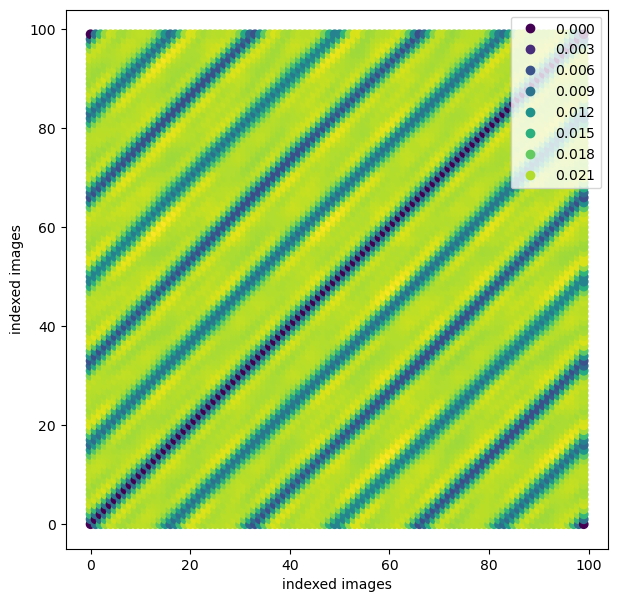

In [140]:
view_dist_matrix(image_function=p3, metric="rmse", num_pixels=60, window_size=60, n_isos=100)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:68: RuntimeWarning: divide by zero encountered in divide
  return 20 * np.log10(max_p / np.sqrt(mse))


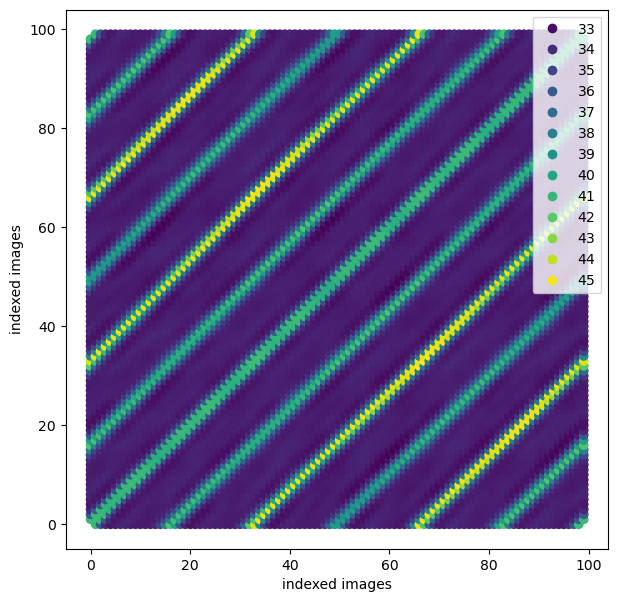

In [141]:
view_dist_matrix(image_function=p3, metric="psnr", num_pixels=60, window_size=60, n_isos=100)

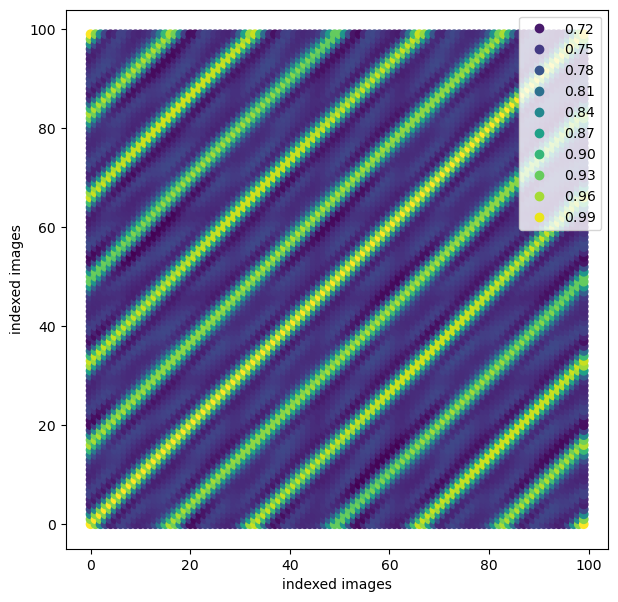

In [142]:
view_dist_matrix(image_function=p3, metric="ssim", num_pixels=60, window_size=60, n_isos=100)

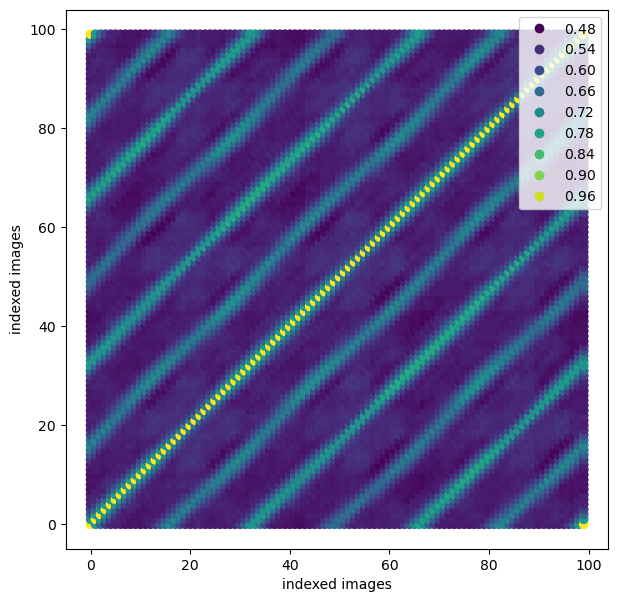

In [143]:
view_dist_matrix(image_function=p3, metric="fsim", num_pixels=60, window_size=60, n_isos=100)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:171: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:171: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:188: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


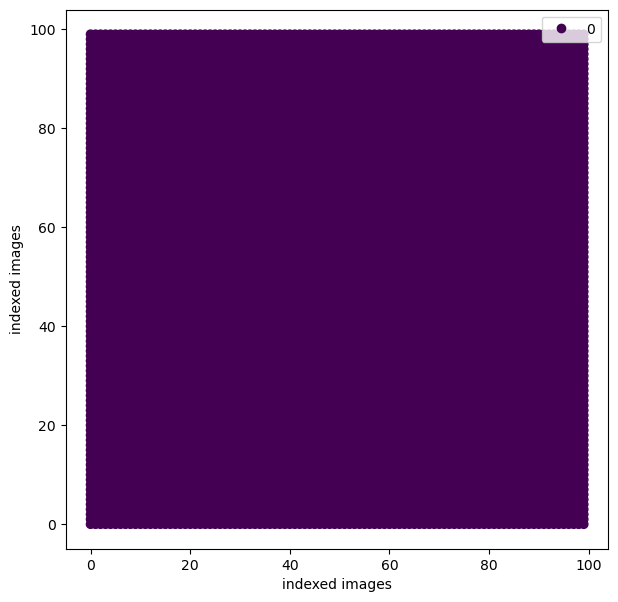

In [144]:
view_dist_matrix(image_function=p3, metric="issm", num_pixels=60, window_size=60, n_isos=100)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  sre_final.append(numerator / denominator)


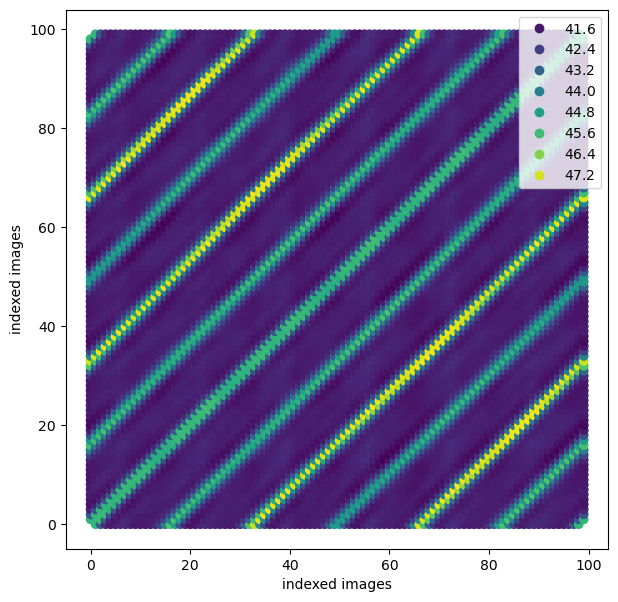

In [145]:
view_dist_matrix(image_function=p3, metric="sre", num_pixels=60, window_size=60, n_isos=100)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:297: RuntimeWarning: invalid value encountered in divide
  val = np.clip(numerator / denominator, -1, 1)


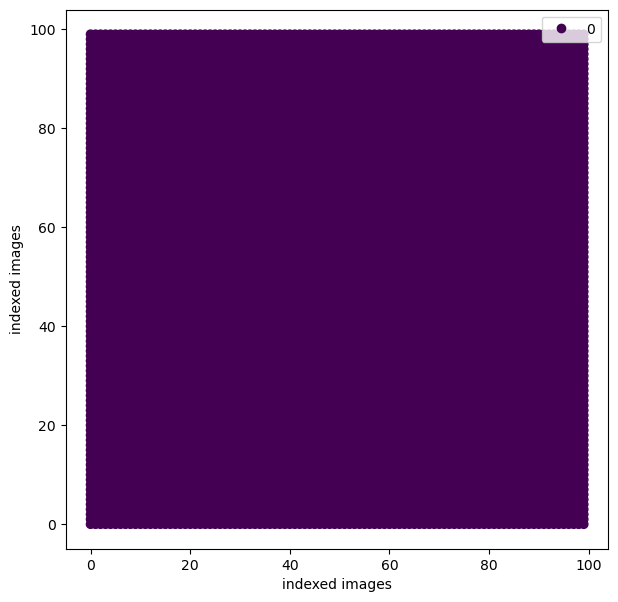

In [146]:
view_dist_matrix(image_function=p3, metric="sam", num_pixels=60, window_size=60, n_isos=100)

In [160]:
def view_dist_matrix(image_function, distance_function, num_pixels, window_size, n_isos):
    
    isoms = []
    for i in range(n_isos):
        theta = (2*pi)/(n_isos-1) * i 
        isom1 = isom(-27,-23.5,0)
        isom2 = isom(0,0,theta)
        isom3 = isom(27,23.5,0)
        f = compose_isoms(isom1,isom2,isom3)
        isoms.append(f)
    
    points_in_R400 = []
    for f in isoms:
        #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
        pixels = get_pixels(num_pixels,window_size)
        point = new_colors(pixels, iso_inv=f, image_function=p3)
        points_in_R400.append(point)
    
    x = range(n_isos)
    y = range(n_isos)
    
    x_points = []
    y_points = [] 
    
    for i in x:
        for j in y:
            x_points.append(i)
            y_points.append(j)
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = distance_function(points_in_R400[i], points_in_R400[j])

    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(M),cmap='viridis')
    plt.legend(*scatter.legend_elements())
    plt.show()
    
    

# Hilbert Curve

In [154]:
from hilbertcurve.hilbertcurve import HilbertCurve

In [155]:
def get_hilbert_pixels(p, x_size, y_size):
    distances = list(range(2**(2*p)-1))
    pixels = HilbertCurve(p,2).points_from_distances(distances)
    for i in range(len(pixels)):
        pixels[i][0] = x_size * pixels[i][0]/ 31
        pixels[i][1] = y_size * pixels[i][1]/ 31
    return pixels

In [156]:
def view_hilbert(p, x_size, y_size):
    
    points = get_hilbert_pixels(p, x_size, y_size)

    x_points = []
    y_points = []
    for i in range(len(points)):
        x_points.append(points[i][0])
        y_points.append(points[i][1])  

    fig = plt.figure(figsize = (7, 7))
    plt.scatter(x_points,y_points, s = 5)
    plt.plot(x_points, y_points)
    plt.show()

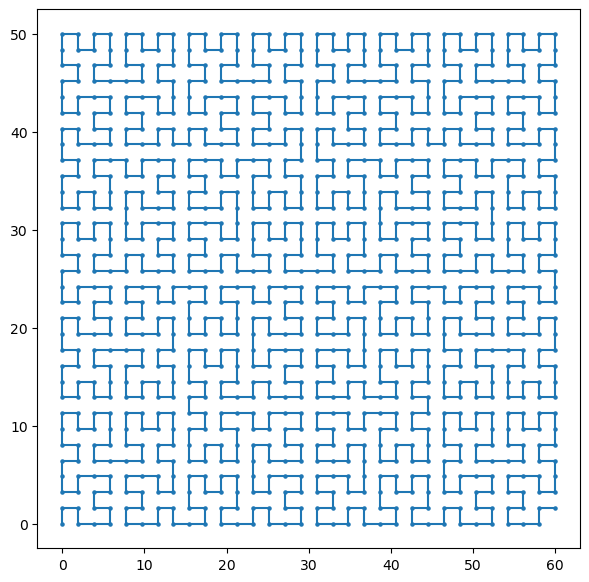

In [6]:
view_hilbert(5, 60, 50)

In [7]:
def pipeline_hilbert(image_function, p, x_size, y_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_hilbert_pixels(p, x_size,y_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

In [8]:
def distance_matrix_hilbert(image_function, x_size, y_size, n_isos, x_translate, y_translate):
    pixels = get_hilbert_pixels(x_size, y_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = dist(isos_inv[i], isos_inv[j])
    return M

In [9]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


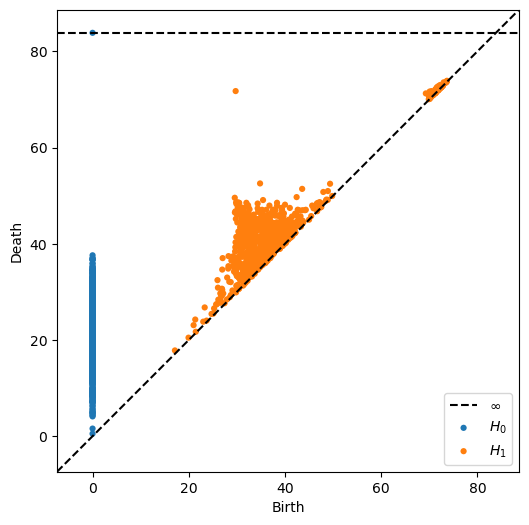

In [47]:
output = pipeline_hilbert(image_function = p3, p = 5, x_size=60, y_size=60, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


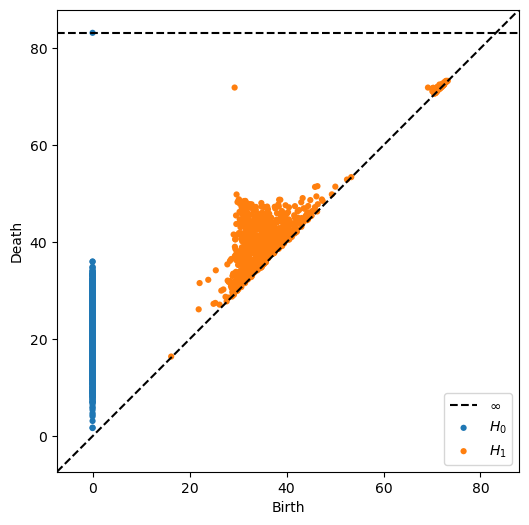

In [48]:
output = pipeline_hilbert(image_function = p3, p = 5, x_size=60, y_size=60, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


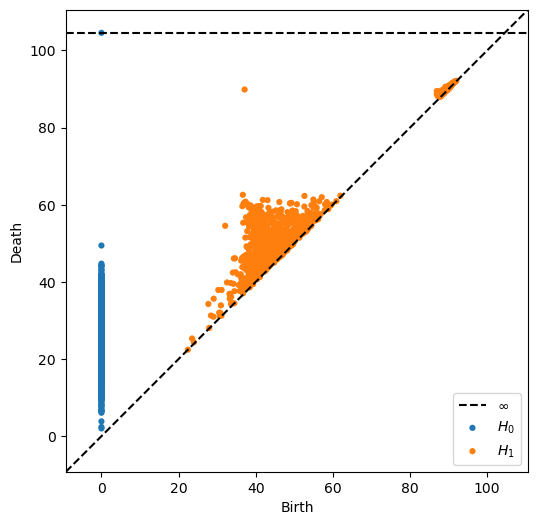

In [49]:
output = pipeline(image_function=p3, num_pixels=40, window_size=60, n_isos=1000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


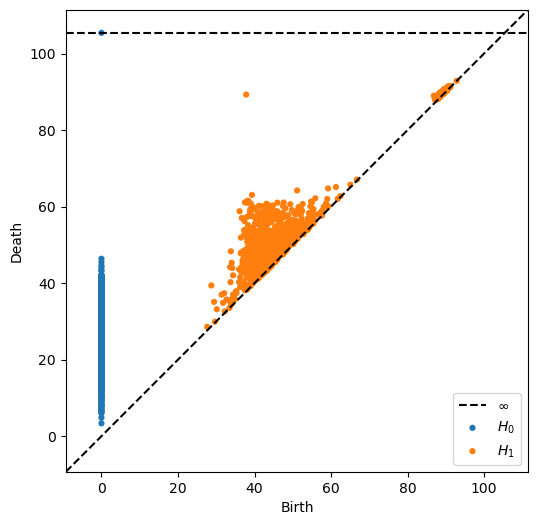

In [50]:
output = pipeline(image_function=p3, num_pixels=40, window_size=60, n_isos=1000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [10]:
def view_dist_matrix(matrix, x_size, y_size, title):
    
    x = range(50)
    y = range(50)
    
    x_points = []
    y_points = [] 
    
    for i in x:
        for j in y:
            x_points.append(i)
            y_points.append(j)
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.title(title)
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(matrix),cmap='viridis')
    plt.legend(*scatter.legend_elements())
    plt.show()

In [11]:
def distance_matrix(image_function, x_size, y_size, n_isos, x_translate, y_translate):
    pixels = get_hilbert_pixels(x_size, y_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = dist(isos_inv[i], isos_inv[j])
    return M

In [12]:
def view_isom(isom_inv, image_function, p, x_size,y_size):
    
    pixels = get_hilbert_pixels(p, x_size, y_size)
    
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(isom_inv(pixel[0], pixel[1]))
    
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels_inv)):
        color = image_function(pixels_inv[i][0],pixels_inv[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])  

    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

In [13]:
def view_dist_matrix(image_function, distance_function, p, x_size, y_size, n_isos, title):
    
    isoms = []
    for i in range(n_isos):
        theta = (2*pi)/(n_isos-1) * i 
        isom1 = isom(-27,-23.5,0)
        isom2 = isom(0,0,theta)
        isom3 = isom(27,23.5,0)
        f = compose_isoms(isom1,isom2,isom3)
        isoms.append(f)
    
    points_in_R400 = []
    for f in isoms:
        #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
        pixels = get_hilbert_pixels(p=p, x_size = x_size, y_size= y_size)
        point = new_colors(pixels, iso_inv=f, image_function=p3)
        points_in_R400.append(point)
    
    x = range(n_isos)
    y = range(n_isos)
    
    x_points = []
    y_points = [] 
    
    for i in x:
        for j in y:
            x_points.append(i)
            y_points.append(j)
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = distance_function(points_in_R400[i], points_in_R400[j])

    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.title(title)
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(M),cmap='viridis')
    plt.legend(*scatter.legend_elements())
    plt.show()
    
    

In [102]:
def some_isos(image_function, distance_function, p, x_size, y_size, n_isos):
    
    isoms = []
    for i in range(n_isos):
        theta = (2*pi)/(n_isos-1) * i 
        isom1 = isom(-27,-23.5,0)
        isom2 = isom(0,0,theta)
        isom3 = isom(27,23.5,0)
        f = compose_isoms(isom1,isom2,isom3)
        isoms.append(f)
    
    points_in_R400 = []
    for f in isoms:
        #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
        pixels = get_hilbert_pixels(p=p, x_size = x_size, y_size= y_size)
        point = new_colors(pixels, iso_inv=f, image_function=p3)
        points_in_R400.append(point)
    
    return points_in_R400[0], points_in_R400[33], points_in_R400[49], points_in_R400[55]

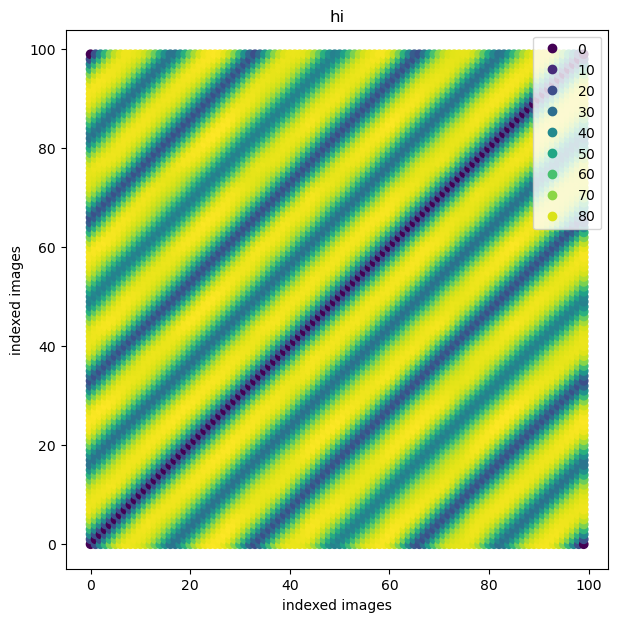

In [229]:
view_dist_matrix(image_function=p3, distance_function=dist, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

In [230]:
[f1,f2, f3, f4] = some_isos(image_function=p3, distance_function=dist, p=5, x_size=60, y_size=60, n_isos=100)

In [231]:
difference = []
for i in range(len(f1)):
    difference.append(f1[i]-f3[i])
np.std(difference)

1.1505916103704676

In [232]:
difference = []
for i in range(len(f1)):
    difference.append(f1[i]-f2[i])
np.std(difference)

0.6411253406748252

In [233]:
difference = []
for i in range(len(f1)):
    difference.append(f1[i]-f4[i])
np.std(difference)

2.473300210843991

In [234]:
difference = []
for i in range(len(f1)):
    difference.append(f2[i]-f4[i])
np.std(difference)

2.449621544302337

In [235]:
dist(f1,f2)

20.51674360728829

In [238]:
dist(f1,f3)

36.801088634643314

In [240]:
distance(f1,f4)

79.11520293678778

In [241]:
dist(f2,f4)

78.37043355321752

In [107]:
def distance(colors1,colors2):
    ret = dist(colors1,colors2)
    if dist(colors1,colors2) < 40:
        difference = []
        for i in range(len(colors1)):
            difference.append(colors1[i]-colors2[i])
        if np.std(difference) > 1:
            ret = 70
    return ret
    

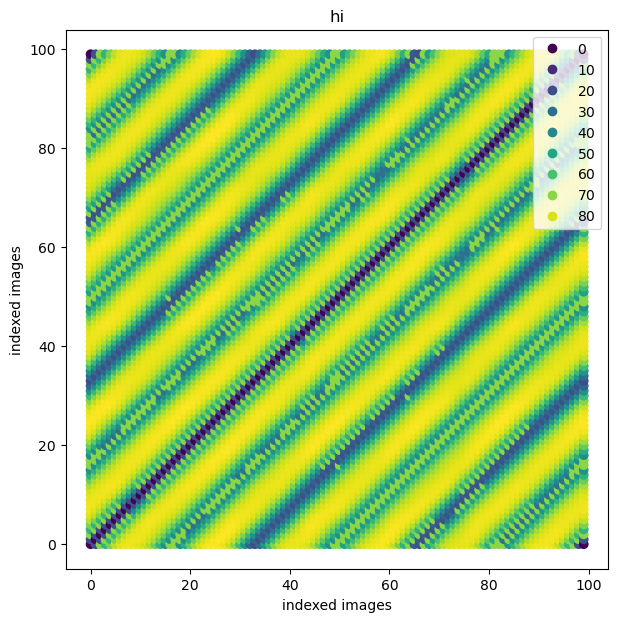

([3.0,
  2.7220199974878874,
  2.4013722182293957,
  2.7505491036383707,
  2.1769653575815995,
  1.5655895658679104,
  1.1762432927244464,
  1.789463728557651,
  0.7346765452953322,
  0.1164349512805587,
  -1.3192299330468233,
  -0.6941864483523523,
  0.1633603796642299,
  1.4509057534856322,
  1.9653528717481845,
  0.9403369522948474,
  -0.06809383300753336,
  -1.1033520369854837,
  -1.9971107757010906,
  -0.7796158919273066,
  -0.9964403207385326,
  -0.6582942641755798,
  -1.8447159712969525,
  -2.269468780049208,
  -3.394036587120131,
  -2.9226640186546753,
  -3.558315840805389,
  -4.031932308577052,
  -3.728242177915828,
  -3.091785279050314,
  -2.099929913821761,
  -2.731665232105826,
  -2.7682050117433237,
  -2.1595248174814543,
  -2.892474134765249,
  -3.6756839941251083,
  -3.9522230129038762,
  -3.520949750944809,
  -2.7674989451451415,
  -3.115828161636758,
  -1.6963280575444344,
  -1.4637352247274604,
  0.06621037100900129,
  -0.028749371003436663,
  0.032140269500400054,
  

In [108]:
view_dist_matrix(image_function=p3, distance_function=distance, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

In [66]:
def dist_matrix_pipeline(image_function, distance_function, p, x_size, y_size, n_isos, x_translate, y_translate):
    
    pixels = get_hilbert_pixels(p, x_size,y_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    
    colors = []
    for i in isos_inv:
        colors.append(new_colors(pixels, i, image_function))
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = distance_function(colors[i], colors[j])
    
    return M

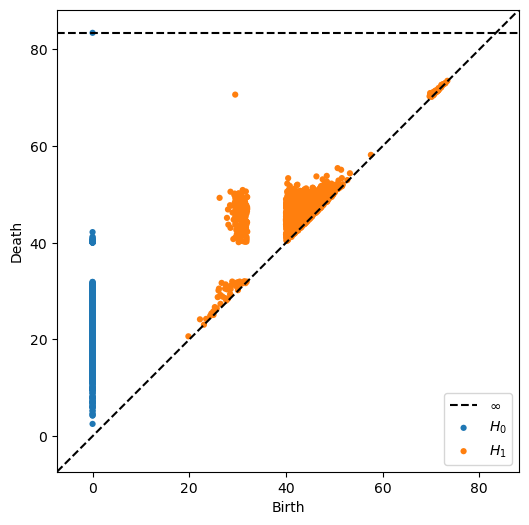

In [135]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

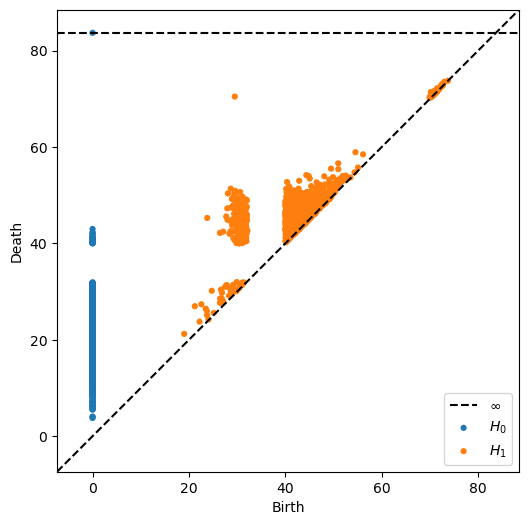

In [134]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
output = ripser(M, maxdim=1, coeff=3,distance_matrix=True)
plot_dgms(output)

In [136]:
def distance2(colors1,colors2):
    ret = dist(colors1,colors2)
    if dist(colors1,colors2) < 40:
        difference = []
        for i in range(len(colors1)):
            difference.append(colors1[i]-colors2[i])
        if np.std(difference) > 1:
            ret = 2 * dist(colors1,colors2)
    return ret

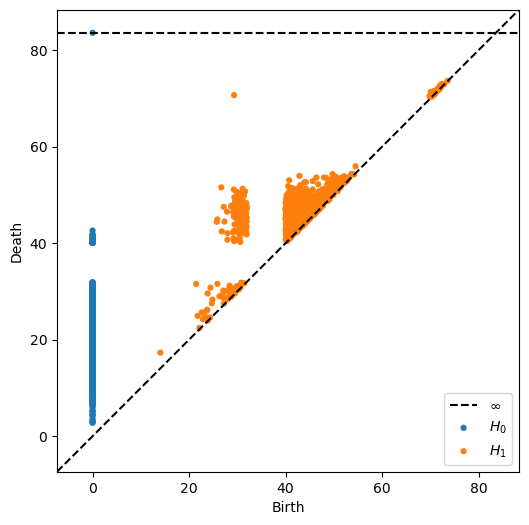

In [137]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance2, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

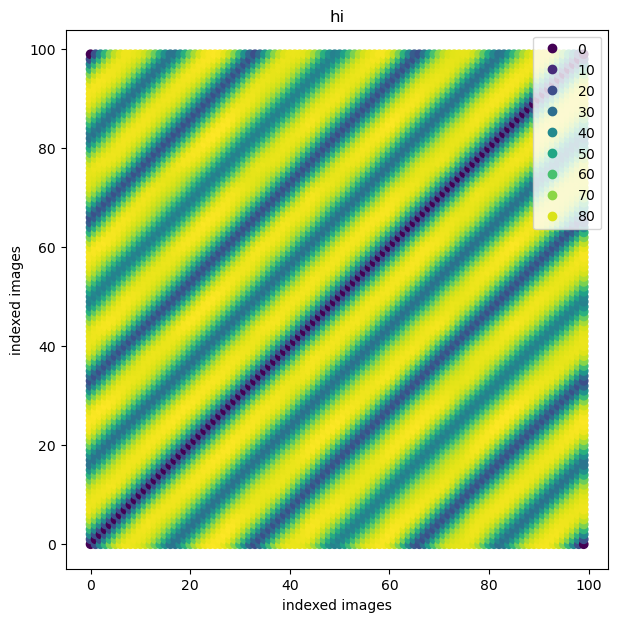

In [139]:
[f1,f2, f3, f4] = view_dist_matrix(image_function=p3, distance_function=dist, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

In [15]:
def chunk(colors1, colors2, chunk_length):
    difference = []
    for i in range(len(colors1)):
        difference.append(colors1[i]-colors2[i])
            
    j = 0 
    chunks = 0 

    count = 0
    while j < len(difference):
        count = 0
        while j < len(difference) and abs(difference[j])>1:
            count += 1
            j += 1
        if j < len(difference) and abs(difference[j])<=1 and count >= chunk_length:
            chunks += 1
            j += 1
        else:
            j += 1
        
    return chunks

In [191]:
chunk(f1,f2,5)

35

In [192]:
chunk(f1,f3, 5)

7

In [193]:
chunk(f1,f4,5)

48

In [195]:
chunk(f1,f2,10)

15

In [196]:
chunk(f1,f3,10)

0

In [194]:
chunk(f1,f4,10)

25

In [210]:
v

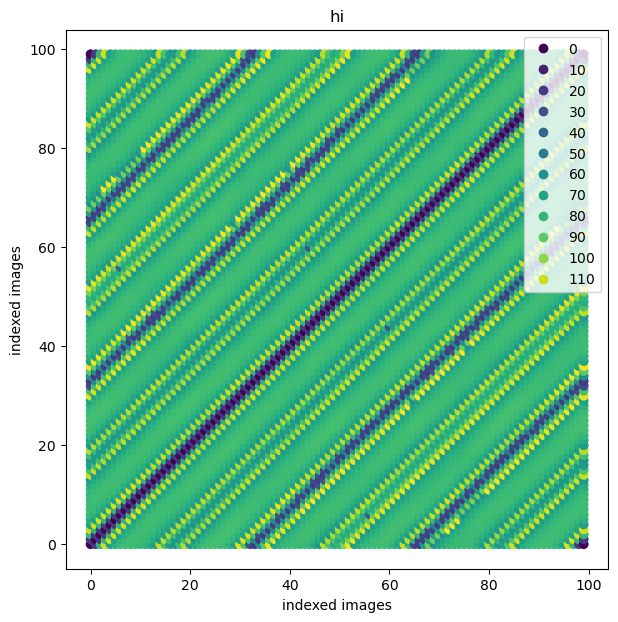

([3.0,
  2.7220199974878874,
  2.4013722182293957,
  2.7505491036383707,
  2.1769653575815995,
  1.5655895658679104,
  1.1762432927244464,
  1.789463728557651,
  0.7346765452953322,
  0.1164349512805587,
  -1.3192299330468233,
  -0.6941864483523523,
  0.1633603796642299,
  1.4509057534856322,
  1.9653528717481845,
  0.9403369522948474,
  -0.06809383300753336,
  -1.1033520369854837,
  -1.9971107757010906,
  -0.7796158919273066,
  -0.9964403207385326,
  -0.6582942641755798,
  -1.8447159712969525,
  -2.269468780049208,
  -3.394036587120131,
  -2.9226640186546753,
  -3.558315840805389,
  -4.031932308577052,
  -3.728242177915828,
  -3.091785279050314,
  -2.099929913821761,
  -2.731665232105826,
  -2.7682050117433237,
  -2.1595248174814543,
  -2.892474134765249,
  -3.6756839941251083,
  -3.9522230129038762,
  -3.520949750944809,
  -2.7674989451451415,
  -3.115828161636758,
  -1.6963280575444344,
  -1.4637352247274604,
  0.06621037100900129,
  -0.028749371003436663,
  0.032140269500400054,
  

In [205]:
view_dist_matrix(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

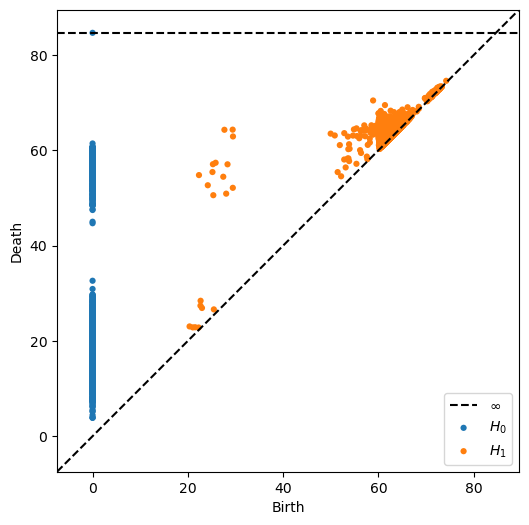

In [206]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

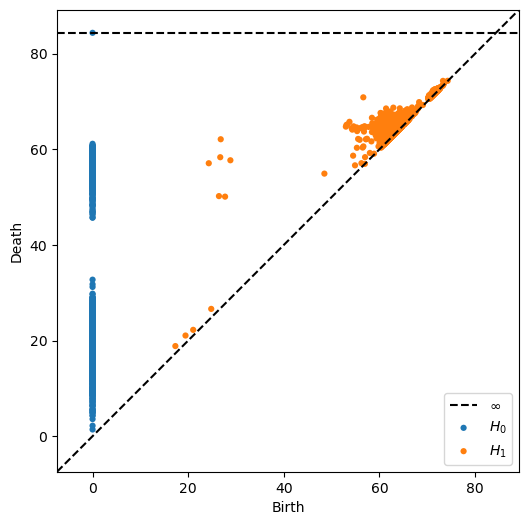

In [211]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

In [212]:
def distance3(colors1, colors2):
    ret = dist(colors1,colors2)
    if dist(colors1,colors2) < 40 and chunk(colors1,colors2,10)>0:
        ret = 2 * dist(colors1,colors2)
    return ret

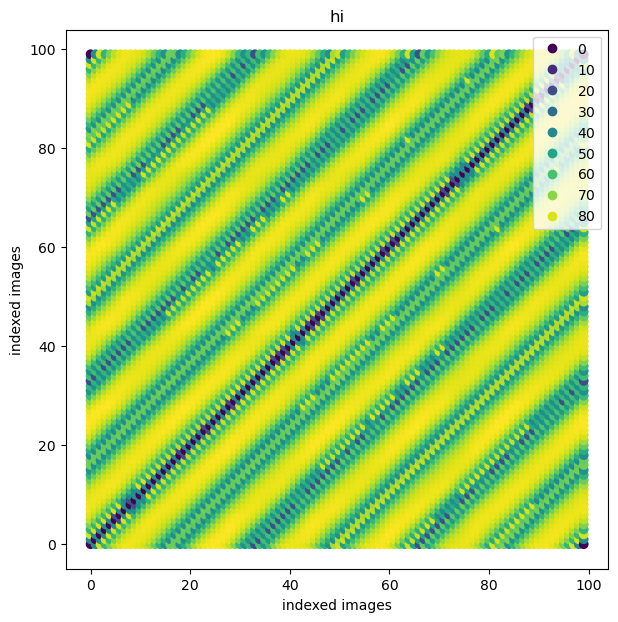

([3.0,
  2.7220199974878874,
  2.4013722182293957,
  2.7505491036383707,
  2.1769653575815995,
  1.5655895658679104,
  1.1762432927244464,
  1.789463728557651,
  0.7346765452953322,
  0.1164349512805587,
  -1.3192299330468233,
  -0.6941864483523523,
  0.1633603796642299,
  1.4509057534856322,
  1.9653528717481845,
  0.9403369522948474,
  -0.06809383300753336,
  -1.1033520369854837,
  -1.9971107757010906,
  -0.7796158919273066,
  -0.9964403207385326,
  -0.6582942641755798,
  -1.8447159712969525,
  -2.269468780049208,
  -3.394036587120131,
  -2.9226640186546753,
  -3.558315840805389,
  -4.031932308577052,
  -3.728242177915828,
  -3.091785279050314,
  -2.099929913821761,
  -2.731665232105826,
  -2.7682050117433237,
  -2.1595248174814543,
  -2.892474134765249,
  -3.6756839941251083,
  -3.9522230129038762,
  -3.520949750944809,
  -2.7674989451451415,
  -3.115828161636758,
  -1.6963280575444344,
  -1.4637352247274604,
  0.06621037100900129,
  -0.028749371003436663,
  0.032140269500400054,
  

In [208]:
view_dist_matrix(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

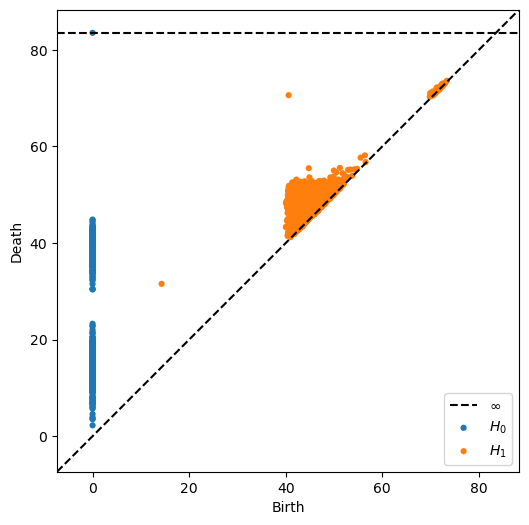

In [209]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

In [221]:
def distance3(colors1, colors2):
    ret = dist(colors1,colors2)
    if dist(colors1,colors2) < 60 and chunk(colors1,colors2,10)>5:
        ret = 80
    return ret

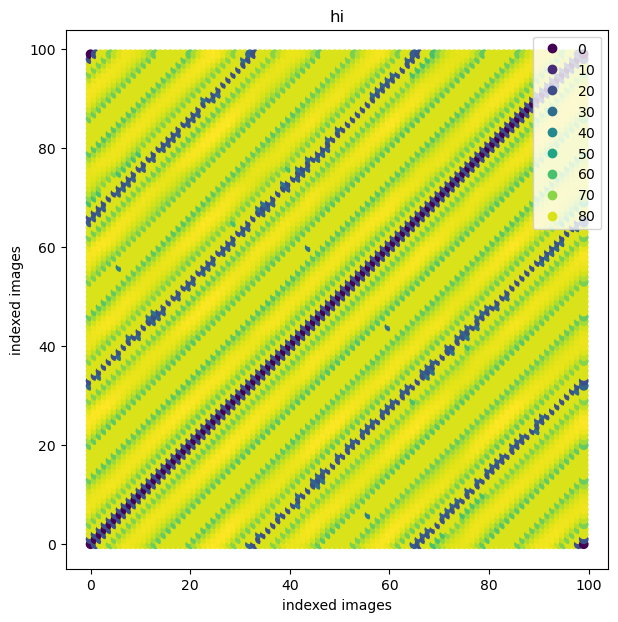

([3.0,
  2.7220199974878874,
  2.4013722182293957,
  2.7505491036383707,
  2.1769653575815995,
  1.5655895658679104,
  1.1762432927244464,
  1.789463728557651,
  0.7346765452953322,
  0.1164349512805587,
  -1.3192299330468233,
  -0.6941864483523523,
  0.1633603796642299,
  1.4509057534856322,
  1.9653528717481845,
  0.9403369522948474,
  -0.06809383300753336,
  -1.1033520369854837,
  -1.9971107757010906,
  -0.7796158919273066,
  -0.9964403207385326,
  -0.6582942641755798,
  -1.8447159712969525,
  -2.269468780049208,
  -3.394036587120131,
  -2.9226640186546753,
  -3.558315840805389,
  -4.031932308577052,
  -3.728242177915828,
  -3.091785279050314,
  -2.099929913821761,
  -2.731665232105826,
  -2.7682050117433237,
  -2.1595248174814543,
  -2.892474134765249,
  -3.6756839941251083,
  -3.9522230129038762,
  -3.520949750944809,
  -2.7674989451451415,
  -3.115828161636758,
  -1.6963280575444344,
  -1.4637352247274604,
  0.06621037100900129,
  -0.028749371003436663,
  0.032140269500400054,
  

In [222]:
view_dist_matrix(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=60, n_isos=100, title='hi')

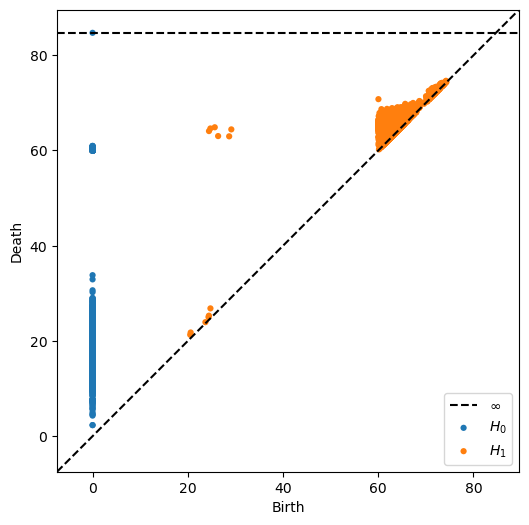

In [223]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance3, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
#output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
#plot_dgms(output)

In [23]:
n_isos = 100
x_size = 60
y_size = 50 
image_function = p3
p=5

isoms = []
for i in range(n_isos):
    theta = (2*pi)/(n_isos-1) * i 
    isom1 = isom(-27,-23.5,0)
    isom2 = isom(0,0,theta)
    isom3 = isom(27,23.5,0)
    f = compose_isoms(isom1,isom2,isom3)
    isoms.append(f)
    
points_in_R400 = []
for f in isoms:
    #view_isom(isom_inv =f , image_function=image_function, p=p, x_size=y_size,y_size=y_size)
    pixels = get_hilbert_pixels(p=p, x_size = x_size, y_size= y_size)
    point = new_colors(pixels, iso_inv=f, image_function=image_function)
    points_in_R400.append(point)

In [24]:
colors1 = points_in_R400[0]
distance_list = []
chunk_list = []

for i in range(len(points_in_R400)):
    distance_list.append(dist(colors1, points_in_R400[i]))
    chunk_list.append(chunk(colors1, points_in_R400[i],10))
    

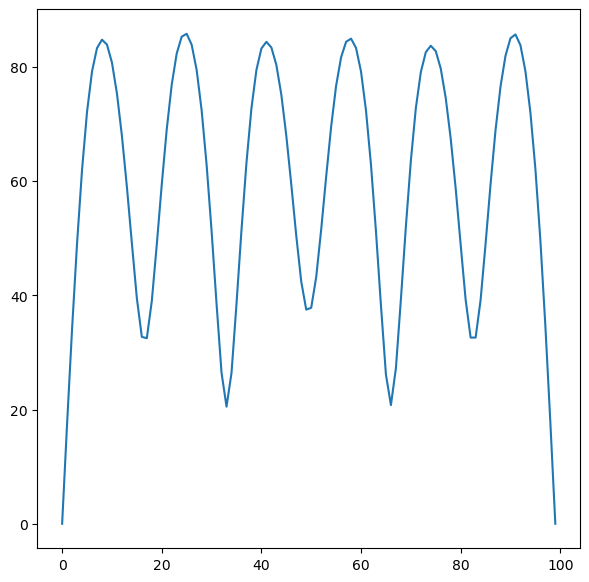

In [25]:
x = range(100)
fig = plt.figure(figsize = (7, 7))
plt.plot(x, distance_list)
plt.show()

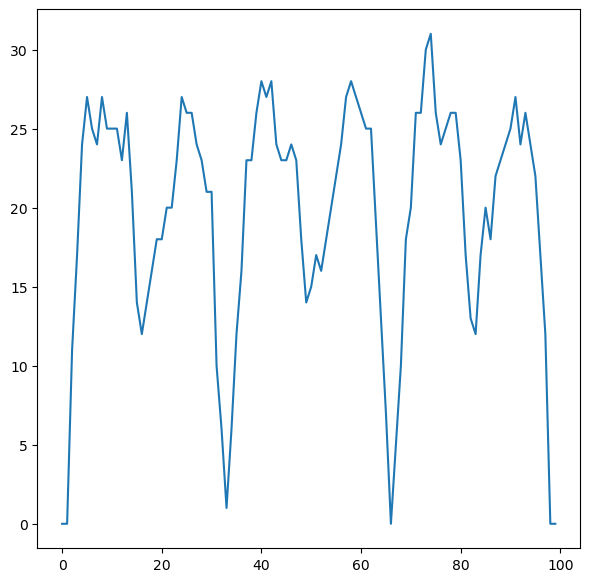

In [26]:
x = range(100)
fig = plt.figure(figsize = (7, 7))
plt.plot(x, chunk_list)
plt.show()

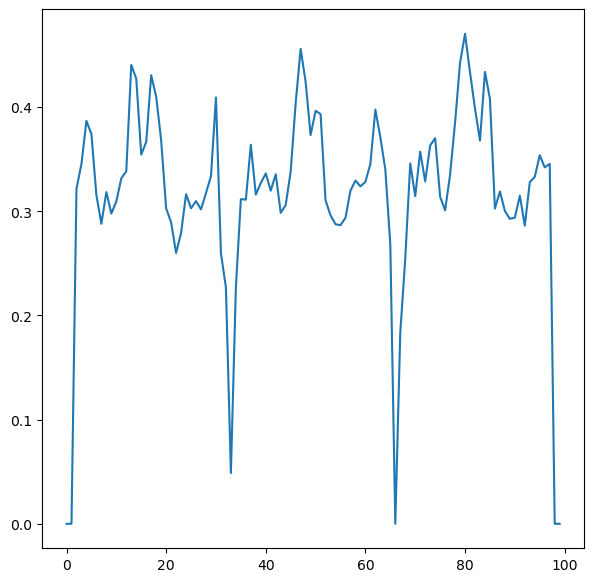

In [29]:
mult = []
for i in range(len(distance_list)):
    if distance_list[i] >0:
        mult.append(chunk_list[i] * 1/distance_list[i])
    else:
        mult.append(0)

x = range(100)
fig = plt.figure(figsize = (7, 7))
plt.plot(x, mult)
plt.show()

In [48]:
def distance4(colors1, colors2):
    if dist(colors1,colors2)>0:
        return chunk(colors1,colors2,10) * 1/dist(colors1,colors2)
    else:
        return 0

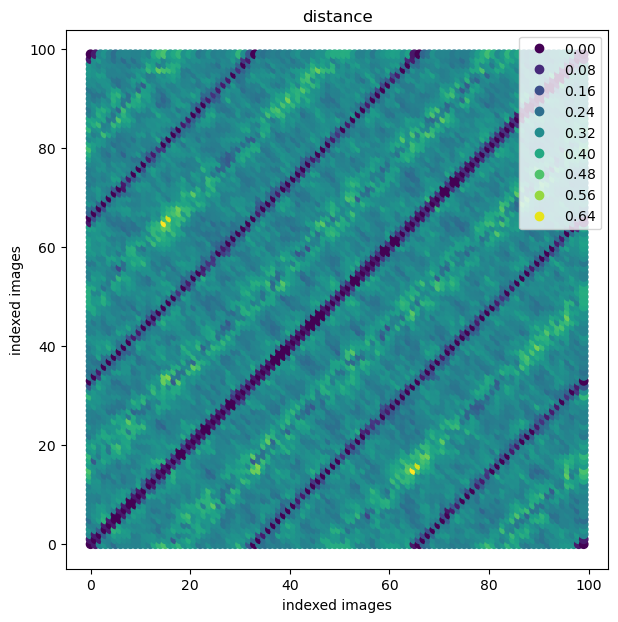

In [50]:
view_dist_matrix(image_function=p3, distance_function=distance4, p=5, x_size=60, y_size=60, n_isos=100, title='distance')

In [42]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance4, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)

In [43]:
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)

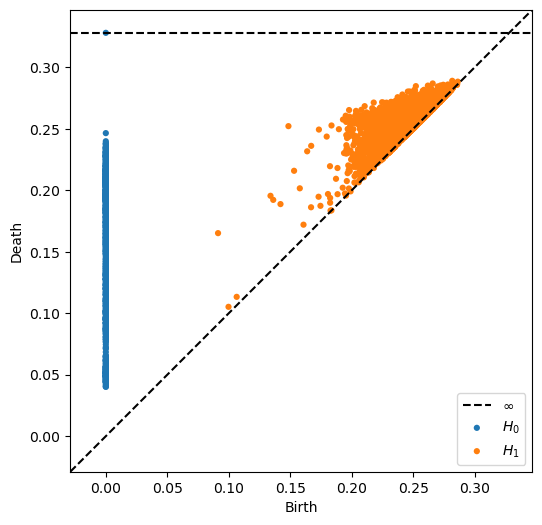

In [44]:
plot_dgms(output)

In [45]:
output = ripser(M, maxdim=1, coeff=3,distance_matrix=True)

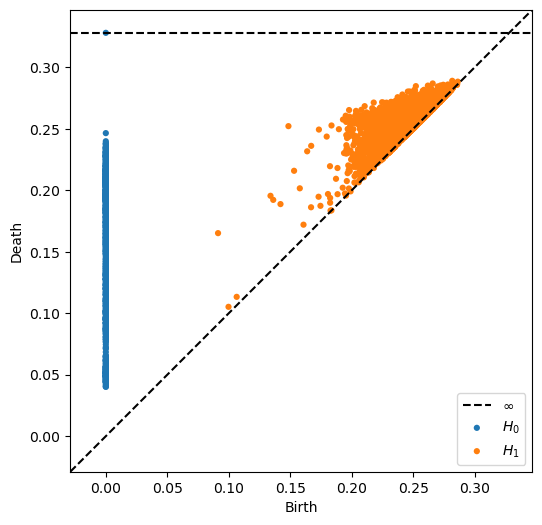

In [46]:
plot_dgms(output)

In [58]:
def distance5(colors1, colors2):
    if 0<dist(colors1,colors2)<40:
        return 150 * chunk(colors1,colors2,10) * 1/dist(colors1,colors2)
    else:
        return dist(colors1,colors2)

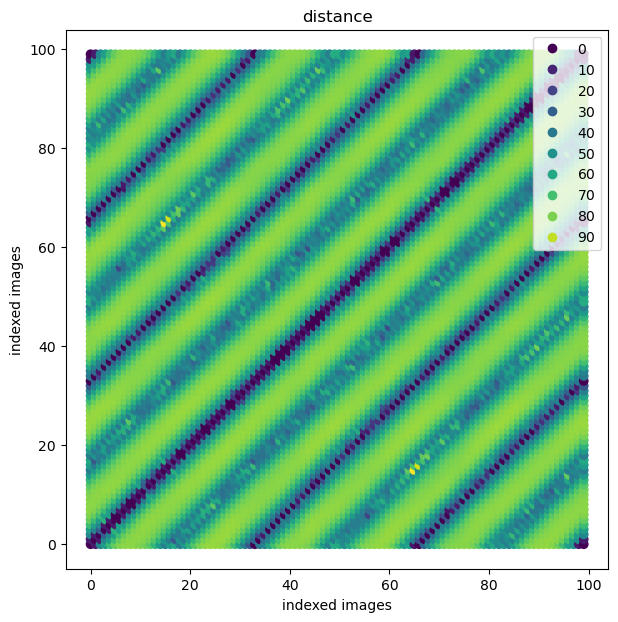

In [59]:
view_dist_matrix(image_function=p3, distance_function=distance5, p=5, x_size=60, y_size=60, n_isos=100, title='distance')

In [63]:
M = dist_matrix_pipeline(image_function=p3, distance_function=distance5, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)


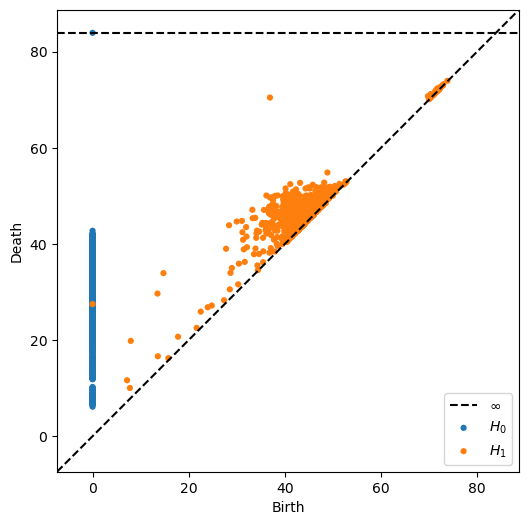

In [64]:
output = ripser(M, maxdim=1, coeff=3,distance_matrix=True)
plot_dgms(output)

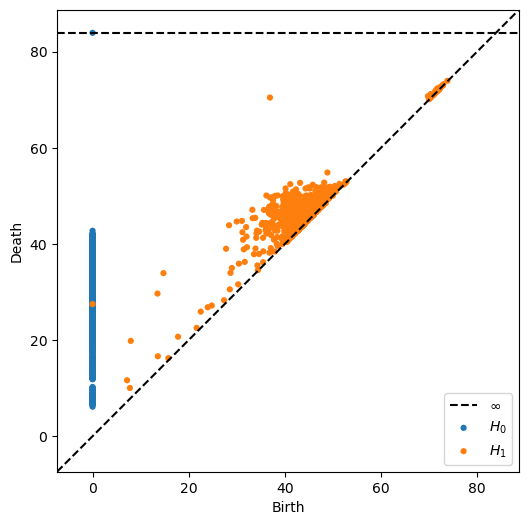

In [67]:
output = ripser(M, maxdim=1, coeff=2,distance_matrix=True)
plot_dgms(output)

In [69]:
def chunk_matrix_pipeline(image_function, chunk_length, p, x_size, y_size, n_isos, x_translate, y_translate):
    
    pixels = get_hilbert_pixels(p, x_size,y_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    
    colors = []
    for i in isos_inv:
        colors.append(new_colors(pixels, i, image_function))
            
    M = np.zeros((n_isos,n_isos))
    for i in range(n_isos):
        for j in range(n_isos):
            M[i][j] = chunk(colors[i], colors[j],10)
    
    return M

In [72]:
M = chunk_matrix_pipeline(image_function=p3, chunk_length = 10, p=5, x_size=60, y_size=50, n_isos=1000, x_translate=1000, y_translate=1000)


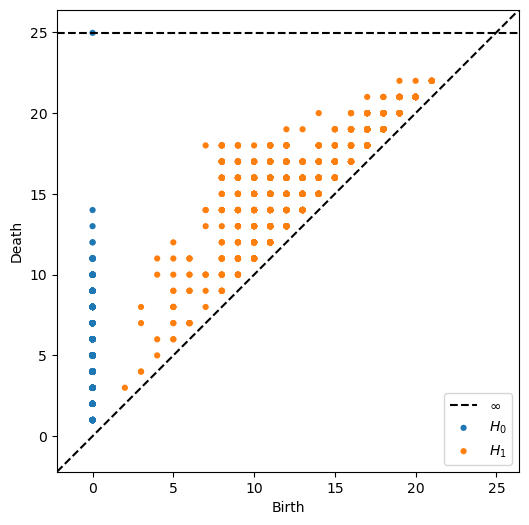

In [73]:
output = ripser(M, maxdim=1, coeff=3,distance_matrix=True)
plot_dgms(output)